# Sound Processing
# Demo Instructions:

<ol type = "1">
    <li> Read in a sound file in a standard sound format (.wav, .mp3, ...), and an array. Be sure to keep track of the sampling rate for later. </li>
    <li> Plot the sound waveform from the array data. Be sure to plot the time axis appropriately. </li>
    <li> For a portion of the sound, plot the sound clip. Again, use the right units for the axis labels. Also show the associated values in the array. </li>
    <li> Plot the fourier spectrum for the clip of sound. </li>
    <li> Pick 3 sounds that vary in pitch. Plot the fourier spectrum for each so one can see that the higher pitch sounds tend to have a higher fourier spectrum. </li>
</ol>

# Solutions: 
## 1. Read in a sound file in a standard sound format (.wav, mp3, ...) and an array. Be sure to keep track of the sampling rate for later. 

In [1]:
from pylab import*
from scipy.io import wavfile
from matplotlib import *
import IPython

sampFreq,snd = wavfile.read('Sounds/440_sine.wav')
#Playing the song
IPython.display.Audio("Sounds/440_sine.wav")

## 2. Plot the sound waveform from the array data. Be sure to plot the time axis appropriately. (optional: if you can play the sound, do that too). 

(5292, 2)
0.12


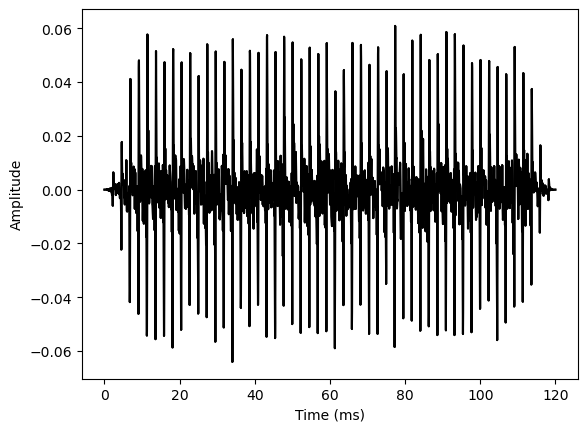

In [2]:
#Checking the shape of the wav file
snd = snd/(2.**15)
print(snd.shape)

#Sampling rate of the sound
samplingRate = 5292/sampFreq
print(samplingRate)

#Plotting the sound
timeArray = arange(0,5292,1)
timeArray = timeArray/sampFreq
timeArray = timeArray * 1000 #scale to milliseconds

plot(timeArray,snd,color='k')
ylabel('Amplitude')
xlabel('Time (ms)')
show()

## 3. For a portion of the sound, plot the sound clip. Again, use the right units for the axis labels. Also show the associated values in the array.

Array data for portion of sound clip
[-8.28877091e-08  1.21071935e-08  1.07102096e-07  1.73225999e-07
  1.95577741e-07  1.76019967e-07  1.30385160e-07  7.91624188e-08
  4.37721610e-08  3.16649675e-08]
Shape of the portion of the sound clip
(10,)


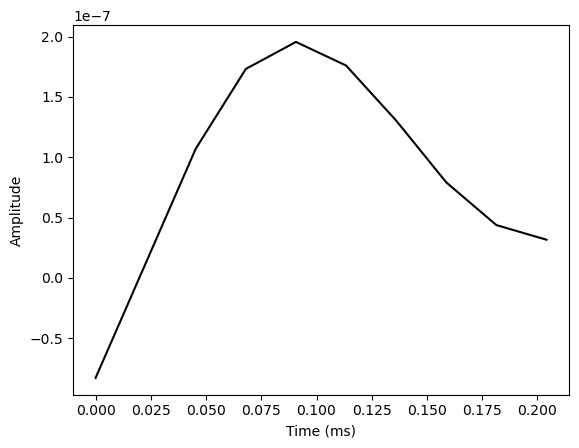

In [3]:
#Looks at 10 time points from the original sound clip of the sine wave 
snd_cut = snd[100:110]
snd_cut = snd_cut/(2.**15)

#Select and work with only one of the channels-- left vs. right 
snd_cut = snd_cut[:,1]
print('Array data for portion of sound clip')
print(snd_cut)
print ('Shape of the portion of the sound clip')
print(snd_cut.shape)

#Plotting the tone for the ten time points of the portion of the sound clip
timeArray = arange(0,10,1)
timeArray = timeArray/sampFreq
timeArray = timeArray * 1000 #scale to milliseconds

plot(timeArray,snd_cut,color='k')
ylabel('Amplitude')
xlabel('Time (ms)')
show()

## 4. Plot the fourier spectrum for the clip of sound. The y axis will be amplitude. Try to set up the x-axis from low frequency on the left to high frequency on the right with the x axis appropriately labeled with using Hertz).

This function will plot the fourier transform for the array data of the certain .wav file. 

In [4]:
#Function for plotting the fourier transform
def plot_fourier(sound):
    n = len(sound)
    p = fft(sound) #take the fourier transform

    nUniquePts = int(ceil((n+1)/2.0))
    p = p[0:nUniquePts]
    p = abs(p)

    p = p/float(n) #scale by the number of points
    p = p**2 #square it to get the power

    if n%2 > 0:
        p[1:len(p)] = p[1:len(p)]*2
    else:
        p[1:len(p)-1] = p[1:len(p)-1]*2
    
    freqArray = arange(0,nUniquePts,1.0)*(sampFreq/n);
    plot(freqArray/1000,10*log10(p),color='k')
    xlabel('Frequency(kHz)')
    ylabel('Power (dB)')
    show()

This line of code will plot the fourier spectrum of the sound of the sin wave. 

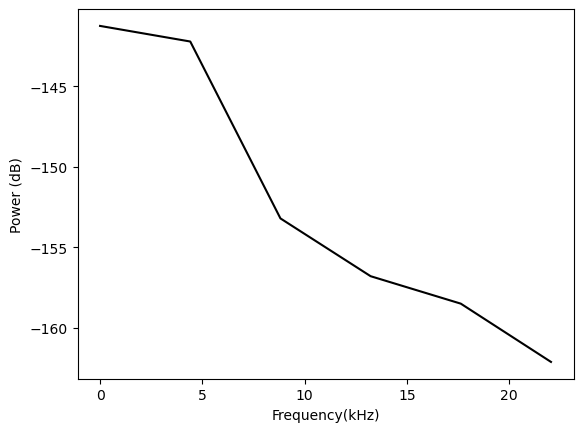

In [5]:
plot_fourier(snd_cut)

## 5. Pick 3 sounds that vary in pitch (or 3 portions of the sound you read before). Plot the fourier spectrum for each so one can see that the higher pitch sounds tend to have a higher fourier spectrum.

### 5.1. Low-Pitch sound

In [6]:
#Low pitch sound
sampFreq,sndLow = wavfile.read('Sounds/bear_growl.wav')
#Playing the sound
IPython.display.Audio("Sounds/bear_growl.wav")

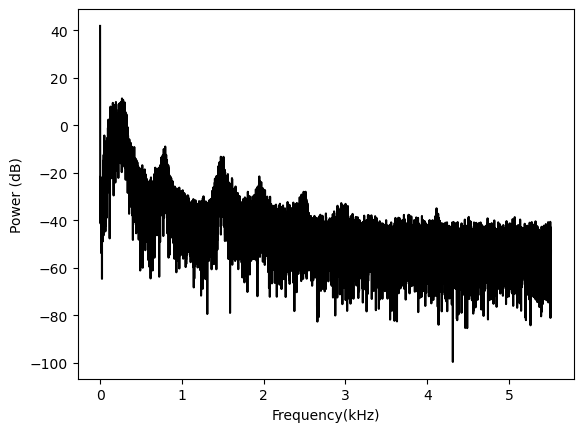

In [7]:
#Fourier spectrum of the low-pitch sound 
plot_fourier(sndLow)

### 5.2. Medium-Pitch sound

In [8]:
#Medium pitch sound
sampFreq,sndMedium = wavfile.read('Sounds/goodbye.wav')
#Playing the sound
IPython.display.Audio("Sounds/goodbye.wav")

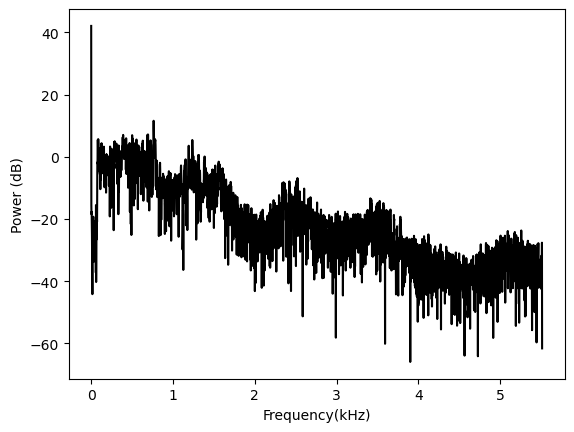

In [9]:
#Fourier spectrum of the medium-pitch sound
plot_fourier(sndMedium)

### 5.3. High-Pitch sound

In [10]:
#High pitch sound
sampFreq,sndHigh = wavfile.read('Sounds/cat_screech.wav')
#Playing the sound
IPython.display.Audio("Sounds/cat_screech.wav")

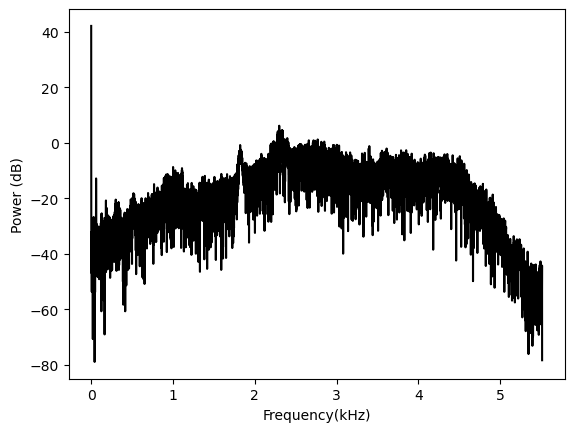

In [11]:
#Fourier spectrum of the high-pitch sound
plot_fourier(sndHigh)